In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np

In [26]:
img = image.load_img('/content/drive/My Drive/Datasets/Image Classification Dataset/seg_train/seg_train/buildings/0.jpg')

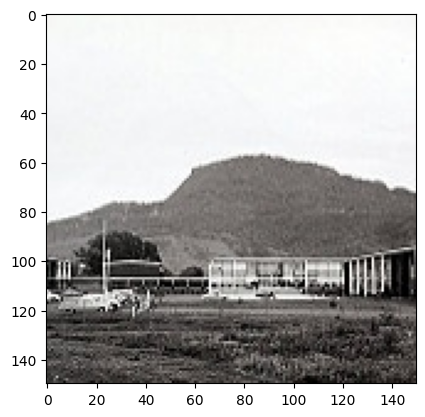

In [27]:
plt.imshow(img)

In [28]:
cv2.imread('/content/drive/My Drive/Datasets/Image Classification Dataset/seg_train/seg_train/buildings/0.jpg').shape

(150, 150, 3)

In [29]:
train = ImageDataGenerator(rescale = 1/255)
pred = ImageDataGenerator(rescale = 1/255)

In [51]:
train_dataset = train.flow_from_directory('/content/drive/My Drive/Datasets/Image Classification Dataset/seg_train/seg_train',
                                          batch_size = 14000,
                                          class_mode = 'categorical')

pred_dataset = train.flow_from_directory('/content/drive/My Drive/Datasets/Image Classification Dataset/seg_pred',
                                          batch_size = 7000,
                                          class_mode = 'categorical')

Found 14034 images belonging to 6 classes.
Found 7351 images belonging to 1 classes.


In [82]:
train_dataset.samples

14034

In [34]:
train_dataset.class_indices

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

In [75]:
vbgs = train_dataset.classes
vbgs[:5]

array([0, 0, 0, 0, 0], dtype=int32)

In [84]:
model = models.Sequential([
    # tf.keras.layers.Conv2D(16(3,3), activation = 'relu', input_shape = (150, 150, 3)),
    # tf.keras.layers.MaxPool2D(2,2),

    # tf.keras.layers.Conv2D(32(3,3), activation = 'relu'),
    # tf.keras.layers.MaxPool2D(2,2),

    # tf.keras.layers.Conv2D(64(3,3), activation = 'relu'),
    # tf.keras.layers.MaxPool2D(2,2),

    layers.Flatten(input_shape = (150, 150, 3)),

    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'sigmoid')
])

In [85]:
model.compile(optimizer='SGD', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [86]:
model_fit = model.fit(train_dataset, steps_per_epoch= 3, epochs= 10, pred_data = pred_dataset)

TypeError: Model.fit() got an unexpected keyword argument 'pred_data'